# Unsupervised Model
tipe model yang tidak memerlukan target

kita berikan data

lalu dia akan olah

contoh model unsupervised:
1. Clustering
2. PCA

## Clustering
teknik dimana data yang sudah kita berikan dikelompokkan ke beberapa kelompok

## PCA
teknik dimana data yang sudah kita berikan dicampur dan menjadi data baru dengan dimensi yang lebih kecil

---

# Clustering

Kita akan pelajari algoritma `K-Means Clustering` mengelompokkan/ clustering data ke sejumlah k kelompok menggunakan rata-rata means
1. pilih mau berapa kelompok k
2. algoritma memilih k titik sebagai centroid (titik tengah per kelompok)
3. semua titik data lainnya menjadi kelompok centroid terdekat
4. hitung ulang lokasi centroid per kelompok dari seluruh data yang ada di dalam kelompok tersebut
5. kita balik ke step 3 untuk mengulangi pengelompokkan data setiap titik. setiap titik adalah milik kelompok centroid terdekat. lanjut, kita ke step 4 lagi untuk menghitung ulang posisi centroid yang baru. terus berulang sampai:
  - kita mencapai limit perulangan (misalkan kita set ke max 300 kali mengulang)
  - centroid tidak pindah tempat, titik data tidak ada yang pindah kelompok

# Save dan Load Model
selain Unsupervised model kita juga akan belajar cara menyimpan model yang sudah kita buat ke file terpisah (save)

lalu cara menggunakan model yang sudah kita simpan di file terpisah (load)

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

import pickle

In [2]:
# import data
# kita gunakan data credit card customer
df_cc = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/Credit%20Card%20Customer%20Data.csv")
df_cc.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
# kita ambil 2 fitur, misalnya Avg_Credit_Limit dan Total_Credit_Cards
df_at = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards']].dropna()
df_at.head()

,Avg_Credit_Limit,Total_Credit_Cards
0,100000,2
1,50000,3
2,50000,7
3,30000,5
4,100000,6


In [4]:
df_at.isnull().sum()

Avg_Credit_Limit      0
Total_Credit_Cards    0
dtype: int64

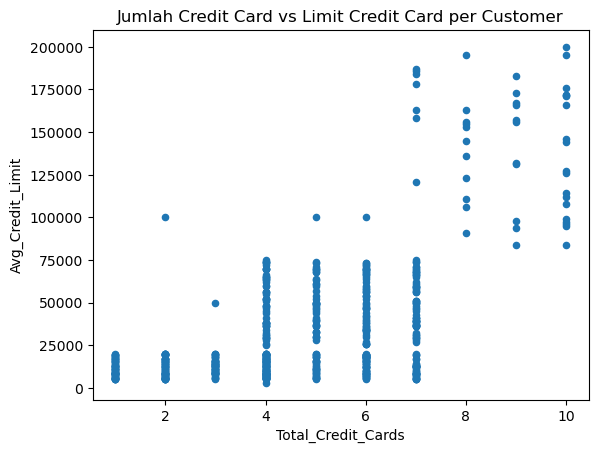

In [5]:
# plot secara visual
df_at.plot(kind="scatter", x="Total_Credit_Cards", y="Avg_Credit_Limit")
plt.title("Jumlah Credit Card vs Limit Credit Card per Customer")
plt.show()

In [6]:
# buat model dan latih model
model_kmc_cc = KMeans(n_clusters=8)
model_kmc_cc.fit(df_at)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans()

In [7]:
# kita bisa minta inertia model Clustering yang kita buat
model_kmc_cc.inertia_

12440675427.54969

In [8]:
# buat copy data asli
df_at2 = df_at.copy()

In [9]:
# gunakan model untuk mengelompokkan data
df_at2['kelompok'] = model_kmc_cc.predict(df_at)
df_at2.head()

,Avg_Credit_Limit,Total_Credit_Cards,kelompok
0,100000,2,5
1,50000,3,0
2,50000,7,0
3,30000,5,3
4,100000,6,5


In [10]:
# kita bisa minta centroid model kita dengan cluster_centers_
model_kmc_cc.cluster_centers_

array([[5.18714286e+04, 5.51428571e+00],
       [1.64863388e+04, 3.76502732e+00],
       [1.44428571e+05, 8.78571429e+00],
       [3.45952381e+04, 5.64285714e+00],
       [6.88939394e+04, 5.62121212e+00],
       [1.03823529e+05, 8.23529412e+00],
       [1.77611111e+05, 8.72222222e+00],
       [8.33653846e+03, 3.68269231e+00]])

In [11]:
# kita bisa lihat setiap kelompok ada berapa banyak data
df_at2.groupby('kelompok').count()

,Avg_Credit_Limit,Total_Credit_Cards
kelompok,,
0,70,70
1,183,183
2,14,14
3,84,84
4,66,66
5,17,17
6,18,18
7,208,208


In [12]:
# kita bisa lihat juga statistik deskriptif per kelompok
df_at2[df_at2['kelompok'] == 0].describe()

,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,70.000000,70.000000,70.0
mean,51871.428571,5.514286,0.0
std,4815.197645,1.163987,0.0
min,44000.000000,3.000000,0.0
25%,48000.000000,4.250000,0.0
50%,51000.000000,6.000000,0.0
75%,56000.000000,6.750000,0.0
max,60000.000000,7.000000,0.0


In [13]:
for k in range(8):
  print('kelompok', k)
  display(df_at2[df_at2['kelompok'] == k].describe())
  print("---------------------------------")

kelompok 0


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,70.000000,70.000000,70.0
mean,51871.428571,5.514286,0.0
std,4815.197645,1.163987,0.0
min,44000.000000,3.000000,0.0
25%,48000.000000,4.250000,0.0
50%,51000.000000,6.000000,0.0
75%,56000.000000,6.750000,0.0
max,60000.000000,7.000000,0.0


---------------------------------
kelompok 1


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,183.000000,183.000000,183.0
mean,16486.338798,3.765027,1.0
std,2422.100450,1.810980,0.0
min,13000.000000,1.000000,1.0
25%,14000.000000,2.000000,1.0
50%,17000.000000,4.000000,1.0
75%,19000.000000,5.000000,1.0
max,25000.000000,7.000000,1.0


---------------------------------
kelompok 2


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,14.000000,14.000000,14.0
mean,144428.571429,8.785714,2.0
std,11920.985283,0.974961,0.0
min,126000.000000,7.000000,2.0
25%,133000.000000,8.000000,2.0
50%,145500.000000,9.000000,2.0
75%,155750.000000,9.750000,2.0
max,158000.000000,10.000000,2.0


---------------------------------
kelompok 3


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,84.000000,84.000000,84.0
mean,34595.238095,5.642857,3.0
std,4641.663203,1.147473,0.0
min,26000.000000,4.000000,3.0
25%,30750.000000,5.000000,3.0
50%,36000.000000,6.000000,3.0
75%,38000.000000,7.000000,3.0
max,43000.000000,7.000000,3.0


---------------------------------
kelompok 4


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,66.000000,66.000000,66.0
mean,68893.939394,5.621212,4.0
std,4697.393018,1.333188,0.0
min,61000.000000,4.000000,4.0
25%,65250.000000,4.000000,4.0
50%,69000.000000,6.000000,4.0
75%,71750.000000,7.000000,4.0
max,84000.000000,10.000000,4.0


---------------------------------
kelompok 5


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,17.000000,17.000000,17.0
mean,103823.529412,8.235294,5.0
std,9534.380513,2.222876,0.0
min,91000.000000,2.000000,5.0
25%,97000.000000,8.000000,5.0
50%,100000.000000,9.000000,5.0
75%,111000.000000,10.000000,5.0
max,123000.000000,10.000000,5.0


---------------------------------
kelompok 6


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,18.000000,18.000000,18.0
mean,177611.111111,8.722222,6.0
std,11566.375653,1.274434,0.0
min,163000.000000,7.000000,6.0
25%,168000.000000,7.250000,6.0
50%,174500.000000,9.000000,6.0
75%,185500.000000,10.000000,6.0
max,200000.000000,10.000000,6.0


---------------------------------
kelompok 7


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,208.000000,208.000000,208.0
mean,8336.538462,3.682692,7.0
std,2169.666048,1.932506,0.0
min,3000.000000,1.000000,7.0
25%,6000.000000,2.000000,7.0
50%,8000.000000,4.000000,7.0
75%,10000.000000,5.000000,7.0
max,12000.000000,7.000000,7.0


---------------------------------


kelompok 0


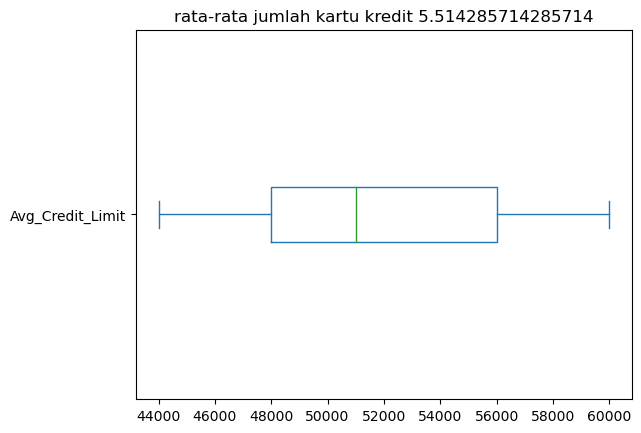

---------------------------------
kelompok 1


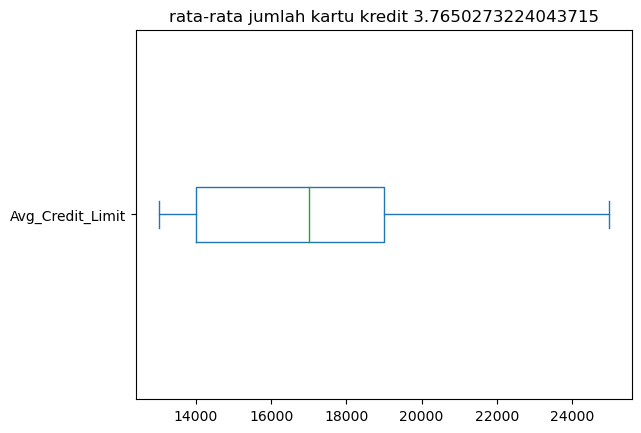

---------------------------------
kelompok 2


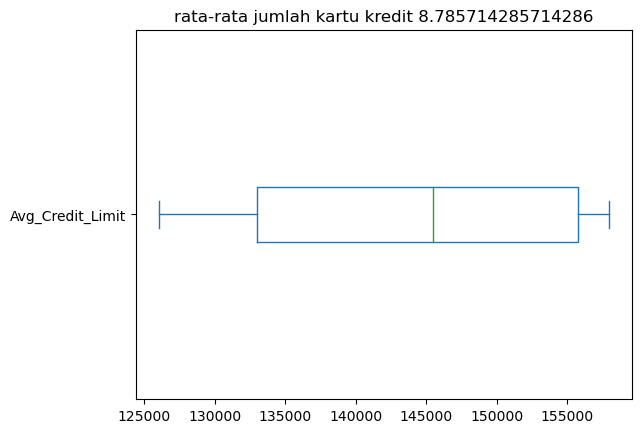

---------------------------------
kelompok 3


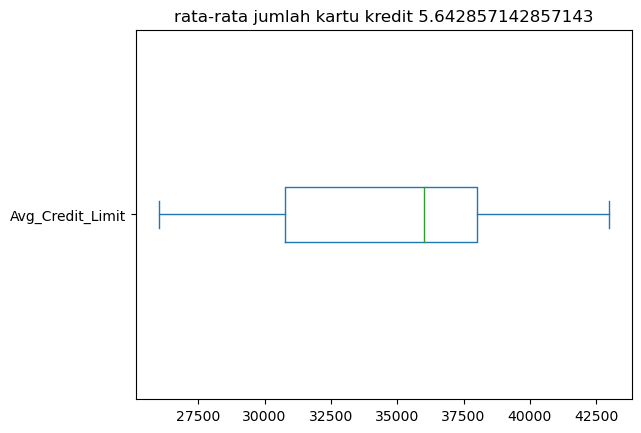

---------------------------------
kelompok 4


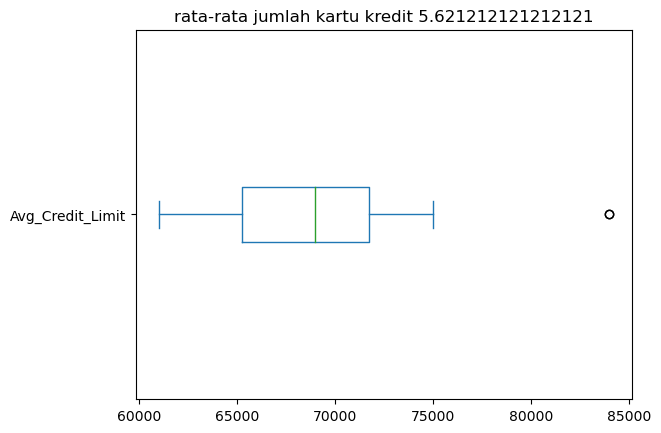

---------------------------------
kelompok 5


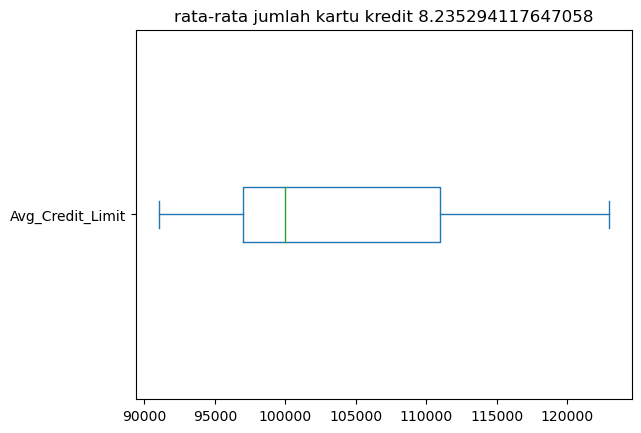

---------------------------------
kelompok 6


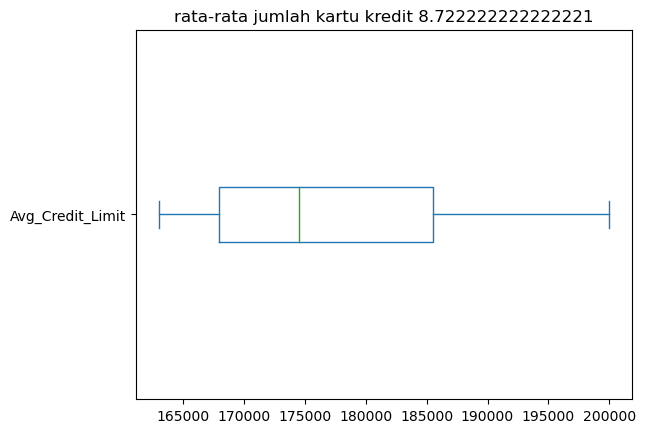

---------------------------------
kelompok 7


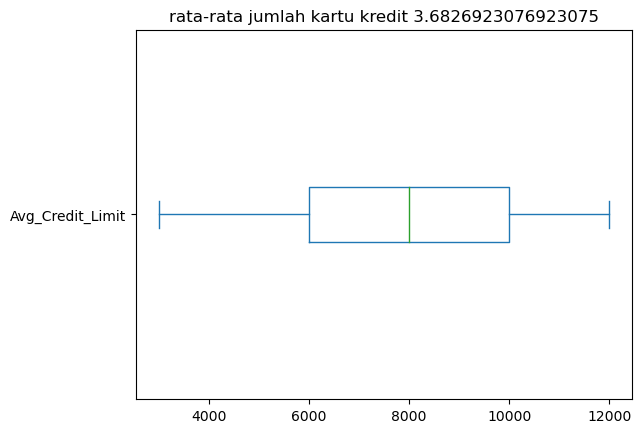

---------------------------------


In [14]:
# bisa minta data yang lebih visual
for k in range(8):
  print('kelompok', k)
  data = df_at2[df_at2['kelompok'] == k]
  data['Avg_Credit_Limit'].plot(kind="box", vert=False)
  plt.title("rata-rata jumlah kartu kredit " + str(data['Total_Credit_Cards'].mean()))
  plt.show()
  print("---------------------------------")

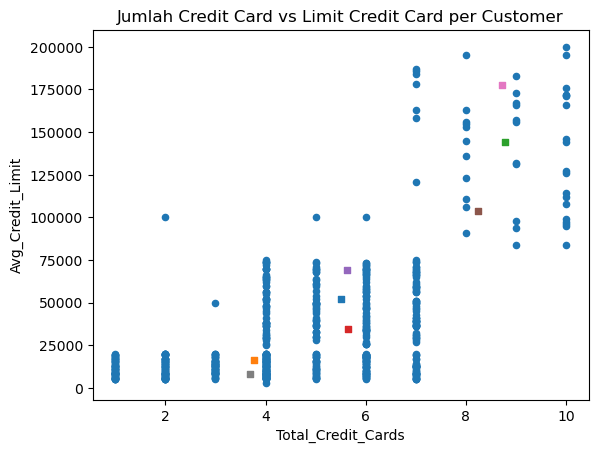

In [15]:
# optional - plot data kita dengan centroid nya, bisa kita lakukan karena data 2 dimensi

# plot secara visual
df_at.plot(kind="scatter", x="Total_Credit_Cards", y="Avg_Credit_Limit")

centroids = model_kmc_cc.cluster_centers_
for cen in centroids:
  plt.scatter(cen[1], cen[0], s=20, marker='s')

plt.title("Jumlah Credit Card vs Limit Credit Card per Customer")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 3 , inertia:  93805173382.07278


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 4 , inertia:  53044221929.509384


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 5 , inertia:  30884746200.305115


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 6 , inertia:  23676885595.558334


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 7 , inertia:  17642774872.185234


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 8 , inertia:  12602927732.74299


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 9 , inertia:  9566998488.626804


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 10 , inertia:  8030325699.355319


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 11 , inertia:  6699332850.628302


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 12 , inertia:  5486958595.515175


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 13 , inertia:  4420437001.997574


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 14 , inertia:  3749345225.240176


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 15 , inertia:  3477734465.762951


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 16 , inertia:  3014058578.6573477


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 17 , inertia:  2693278858.669684


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 18 , inertia:  2508454546.091543


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 19 , inertia:  2162320782.852465


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


jumlah kelompok 20 , inertia:  1901879782.6203086


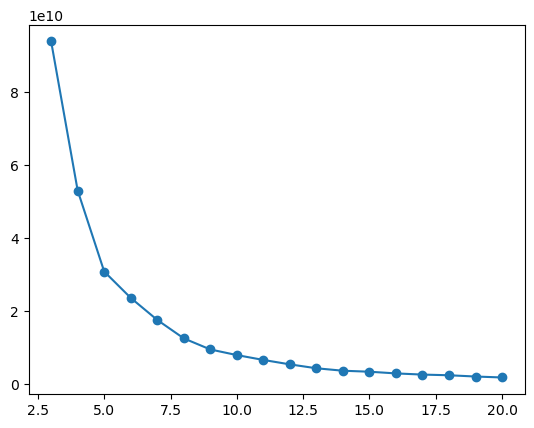

In [16]:
# elbow method
# membantu menentukan jumlah cluster/ kelompok yang optimal

# misal kita tes antara 3-20 kelompok
num_k = range(3,21)
inertias = []
for k in num_k:
  model_kmeans = KMeans(n_clusters=k)
  model_kmeans.fit(df_at)
  inertias.append(model_kmeans.inertia_)
  print('jumlah kelompok', k, ", inertia: ", model_kmeans.inertia_)

plt.plot(num_k, inertias, marker="o")

kalau dari elbow plot diatas, posisi siku sepertinya berada di antara 7 atau 8 kelompok

Clustering kita gunakan untuk membuat kelompok dari raw data yang kita miliki.

Contohnya, data customer credit card diatas, awalnya tidak memiliki kelompok customer tertentu. Kita buatkan kelompok2 tersebut menggunakan metode Clustering.

Setelah kita buatkan kelompok, kita perlu lanjut menganalisa, apa kebiasaan penggunaan credit card per kelompok? Apa yang membedakan kelompok 0 dengan kelompok 1, atau lainnya?

Dari sana, kita baru membuat insight, apakah ada kebiasaan tertentu dari setiap kelompok customer. Baru lanjut ke business intelligence, untuk membuat promosi yang menargetkan kelompok customer tertentu.

Selain itu, dengan adanya kolom baru "kelompok" kita bisa lanjut membuat model tipe Supervised, Classification, yang bisa memprediksi customer baru kita kira2 masuk ke kelompok yang mana.

1. Persiapan data
2. Pemilihan jumlah cluster
3. latih model
4. gunakan model untuk membuat kolom baru "kelompok" di data
5. analisa persamaan data di suatu kelompok, dan perbedaan data antar kelompok, carilah insight atau pattern di data.
6. optional - lanjutkan dengan membuat model Classification

# PCA
Principal Component Analysis

kolom data bukan fitur

fitur adalah satu bagian dari data, misalkan data penjualan rumah, punya fitur luas tanah, punya fitur luas bangunan, punya fitur jumlah kamar tidur, dan lainnya. kalau misalkan di data tersebut ada kolom ktp pembeli, itu tidak bisa kita gunakan sebagai fitur kan? karena ktp pembeli tidak membantu memprediksi harga rumah yang dibeli.

untuk data yang mau kita gunakan membuat model supervised, kita pilih juga satu target, seperti harga rumah, kita bisa juga sebenarnya memilih data lain sebagai target, seperti model yang menebak luas bangunan. fitur harga rumah, target luas bangunan. bisa tukar tukar fitur dengan target, karena kedua kolom data tersebut sama sama mendeskripsikan datanya.

PCA mencampur aduk fitur2 dari data kita. kemudian dia buatkan kolom kolom baru campuran fitur kita, masing masing dengan rasio yang berbeda. Misalnya, PC1 adalah 0.5*luas_rumah + 0.1*luas_bangunan - 3.5*jumlah_kamar_tidur -- gabungan 3 fitur di 1 kolom PC1, Principal Component 1, untuk 1 kolom.

Tujuan adalah mengurangi dimensi data. Dengan mencampur 3 fitur tadi menjadi 1 kolom Principal Component, dimensi data kita berkurang dari 3 dimensi fitur menjadi 1 dimensi PC1.

Terkadang data kita besar sekali, 100, 1000, 1jt fitur, kita gunakan PCA untuk mengurangi dimensi data tersebut menjadi beberapa Principal Component. Contohnya misalnya 2 PC, dua principal component, dua kolom data hasil campuran semua fitur, yang paling menentukan target.

In [17]:
# kita bisa coba buat PC1 dan PC2 dari data tes darah seseorang dengan targetnya punya/tidak punya sakit ginjal kronis
# https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

df_kid = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/kidney_disease.csv")
df_kid.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [18]:
# kita cek missing values
df_kid.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [19]:
# kita tidak perlu kolom id, ini seperti kolom ktp
df_kid = df_kid.drop(columns=['id'])

In [20]:
# drop missing values
df_kid_clean = df_kid.dropna()
df_kid_clean.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [21]:
# karena ada data tipe text kita juga perlu encoding
df_kid_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [22]:
df_kid_clean.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [23]:
df_kid_clean2 = df_kid_clean.copy()

col_to_encode = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']

for c in col_to_encode:
  le = LabelEncoder()
  df_kid_clean2[c] = le.fit_transform(df_kid_clean[c])
  print(c, le.classes_)

df_kid_clean2.head()

rbc ['abnormal' 'normal']
pc ['abnormal' 'normal']
pcc ['notpresent' 'present']
ba ['notpresent' 'present']
pcv ['16' '20' '22' '23' '24' '25' '26' '28' '29' '30' '31' '32' '33' '34'
 '35' '36' '37' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '50' '51' '52' '53' '54' '9']
wc ['\t6200' '\t8400' '10200' '10300' '10400' '10500' '10700' '10900' '11000'
 '11500' '12000' '12100' '12400' '12500' '12800' '14600' '15200' '15700'
 '16300' '16700' '18900' '19100' '26400' '3800' '4300' '4500' '4700'
 '5000' '5100' '5200' '5300' '5400' '5500' '5600' '5700' '5800' '6000'
 '6200' '6300' '6400' '6500' '6600' '6700' '6800' '6900' '7000' '7100'
 '7200' '7300' '7400' '7500' '7700' '7800' '7900' '8000' '8100' '8200'
 '8300' '8400' '8600' '8800' '9000' '9100' '9200' '9300' '9400' '9500'
 '9600' '9700' '9800' '9900']
rc ['2.1' '2.5' '2.6' '2.7' '2.9' '3.0' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6'
 '3.7' '3.8' '3.9' '4' '4.1' '4.2' '4.3' '4.5' '4.6' '4.7' '4.8' '4.9'
 '5.0' '5.1' '5.2' '5.3' '5.4' '5.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


kolom pcv wc dan rc datanya bersifat numerik dan baiknya BUKAN kita encoding, tapi kita convert saja data kolom tersebut menjadi tipe numerik.

kolom appet dan classification, data yang sifatnya negatif seperti poor dan notckd baiknya kita set ke 0 bukan ke 1, supaya mudah diingat karena bisanya 0 = false = tidak ada = null, dan 1 = ada = positive = true

untuk menukarnya kita akan perlu teknik encoding yang lain, bisa kita bahas di sesi 15. untuk sekarang datanya kita gunakan as is hasil encoding seperti diatas.

In [24]:
df_kid_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    int32  
 6   pc              158 non-null    int32  
 7   pcc             158 non-null    int32  
 8   ba              158 non-null    int32  
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int32  
 16  wc              158 non-null    int32  
 17  rc              158 non-null    int

setelah data cleaning, kita lanjut membuat model tipe PCA

kita mau buat 2 PC saja

data yang sifatnya target seperti kolom "classification" tidak mau kita include kedalam PCA, karena tujuannya untuk mengurangi dimensi fitur2 bukan target.

In [25]:
# tanpa kolom "classification" kita punya 24 kolom data

features = df_kid_clean2.drop(columns=["classification"])
features.head(3)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,11,42,14,1,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,9.5,8,11,12,1,1,0,1,0,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,10.8,11,25,13,1,1,0,1,1,0


In [26]:
# kita buat dan latih model PCA
# pilih mau berapa PC
model_pca_kid = PCA(n_components=2)
model_pca_kid.fit(features)


PCA(n_components=2)

In [27]:
pd.DataFrame(model_pca_kid.components_, columns=features.columns, index=["PC1", "PC2"])

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
PC1,0.075273,0.042634,-0.000051,0.013312,0.008533,-0.002507,-0.003139,0.001399,0.001314,0.905819,...,-0.024757,-0.064398,-0.060344,-0.07710,0.004134,0.004130,0.001819,0.002110,0.002248,0.001394
PC2,0.005481,0.057413,-0.000030,0.012150,-0.002319,-0.000685,-0.003350,0.001514,0.000155,-0.412096,...,-0.031673,-0.057568,-0.024257,-0.08687,0.002808,0.001587,0.000256,0.002377,0.003042,0.004152


In [28]:
df_kid_transformed = model_pca_kid.transform(features)
df_kid_transformed = pd.DataFrame(df_kid_transformed, columns=['PC1', 'PC2'], index=features.index)
df_kid_transformed

,PC1,PC2
3,-9.495715,11.845020
9,-28.573594,79.366632
11,231.661989,-93.584316
14,45.094654,28.203438
20,77.606008,71.303807
...,...,...
395,6.010450,-7.566777
396,-63.034951,1.147229
397,-42.402686,-11.745719
398,-21.491076,2.437640


dengan mengubah data awal kita 24 fitur menjadi dua angka PC1 dan PC2 menggunakan formula di `pd.DataFrame(model_pca_kid.components_, columns=features.columns, index=["PC1", "PC2"])` kita mengurangi dimensi data kita dari 24 menjadi 2

<Figure size 640x480 with 0 Axes>

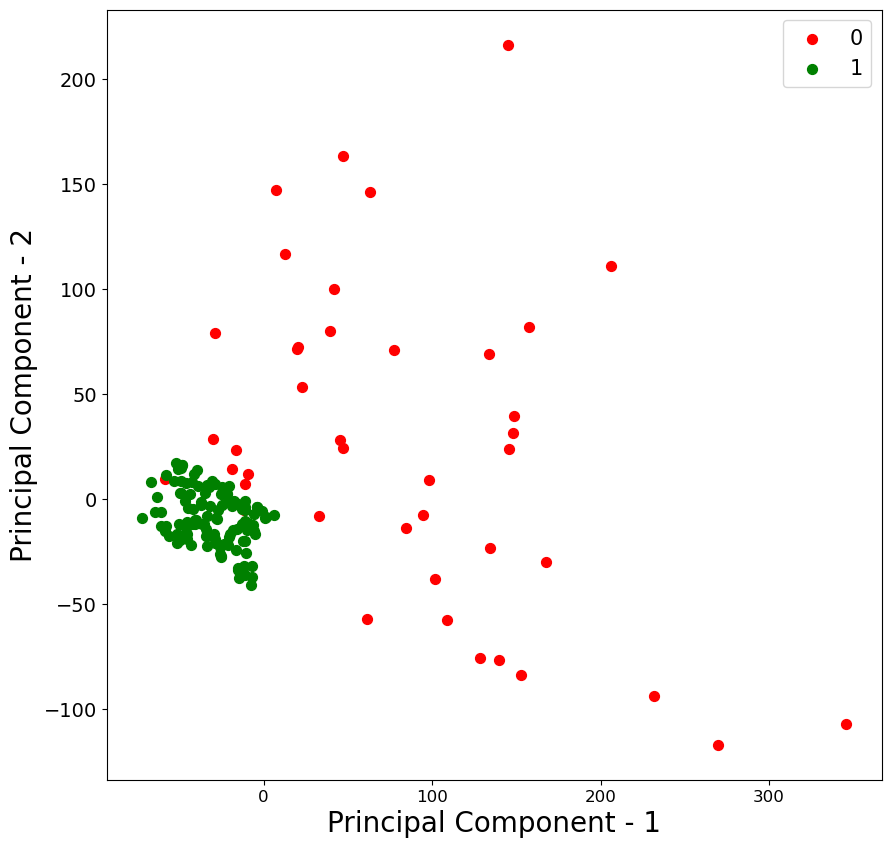

In [29]:
# percantik plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)

# karena datanya 2 dimensi, kita bisa buat visualisasi grafik 2 dimensi
targets = [0, 1]

# classification ['ckd' 'notckd'] ckd sakit, kita kasih warna merah red r, notckd hijau green g
colors = ['r', 'g']

for target, color in zip(targets,colors):
  indicesToKeep = df_kid_clean2['classification'] == target
  plt.scatter(df_kid_transformed.loc[indicesToKeep, 'PC1'],
              df_kid_transformed.loc[indicesToKeep, 'PC2'],
              c = color, s = 50)

plt.legend(targets, prop={'size': 15})
plt.show()

# Save dan Load Model
dengan bantuan pickle kita bisa:
1. save model yang sudah kita buat ke file terpisah
2. load model yang sudah kita save di file terpisah masuk ke colab/ code editor lain

In [30]:
filename = 'model_pca_kidney.pkl'
pickle.dump(model_pca_kid, open(filename, 'wb'))

setelah di save, jangan lupa untuk download file model tersebut jika menggunakan google colab, karena colab akan hapus semua temporary file

setelah di save, file model tersebut bisa kita load untuk kita pakai

In [31]:
filename = 'model_pca_kidney.pkl'
model_pca_kemaren = pickle.load(open(filename, 'rb'))

berikutnya, contoh model pca kita gunakan untuk mengubah 24 fitur dari data df_kidney yang sudah kita clean, menjadi 2 kolom PC

In [32]:
data = df_kid_clean2.drop(columns=['classification'])
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,11,42,14,1,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,9.5,8,11,12,1,1,0,1,0,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,10.8,11,25,13,1,1,0,1,1,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,5.6,0,8,2,1,1,1,1,1,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,7.7,4,63,7,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,25,42,23,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,32,52,36,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,27,41,28,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,29,47,33,0,0,0,0,0,0


In [33]:
pd.DataFrame(model_pca_kemaren.transform(data), index=df_kid_clean2.index, columns=['PC1', 'PC2'])

,PC1,PC2
3,-9.495715,11.845020
9,-28.573594,79.366632
11,231.661989,-93.584316
14,45.094654,28.203438
20,77.606008,71.303807
...,...,...
395,6.010450,-7.566777
396,-63.034951,1.147229
397,-42.402686,-11.745719
398,-21.491076,2.437640


mungkin lebih mudah dibayangkan kalau yang kita save dan load adalah model tipe Supervised, seperti model yang memprediksi apakah seseorang punya sakit diabetes/tidak dari tingkat gula darahnya (1 fitur, 1 target)

setelah di load, kita bisa pakai model tersebut untuk membuat prediksi seseorang sakit diabetes/ tidak dengan mengisi 1 fitur gula darah tersebut.